# How-to for transforming coordinate systems in python

the following content is divided into several parts, showing the adventure this author had whilst exploring the python-data-science-rabbithole.

## Part I: some Plots for understanding

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import string

a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)
A = np.array([a, b, c, d])


### Identity Matrix

The identity matrix multiplied by pointvector x gives pointvector x.

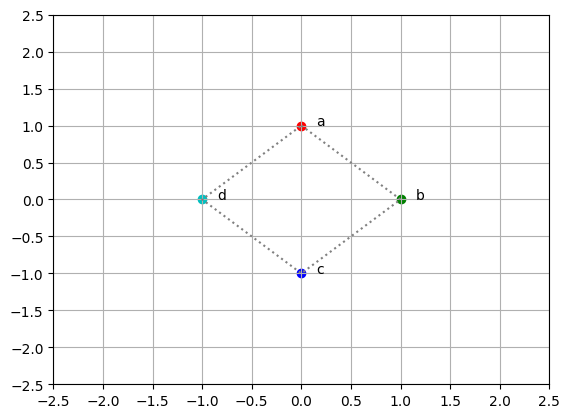

In [5]:
I = np.eye(3)

color_lut = 'rgbc'
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

### Scaling Matrix
The scaling matrix is self-expalainatory. (hope so)

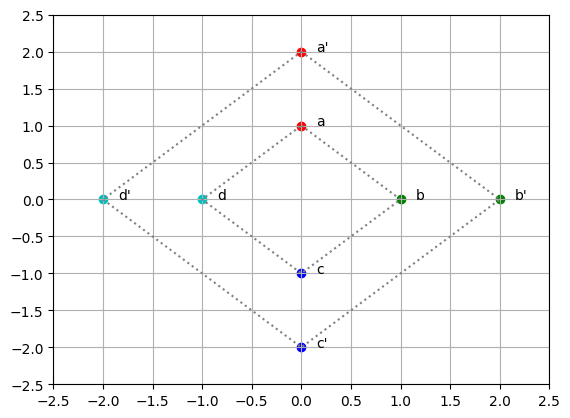

In [122]:
T_s = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

### Rotation Matrix
In this example, the points we have shall be rotated 90 degrees around p0.

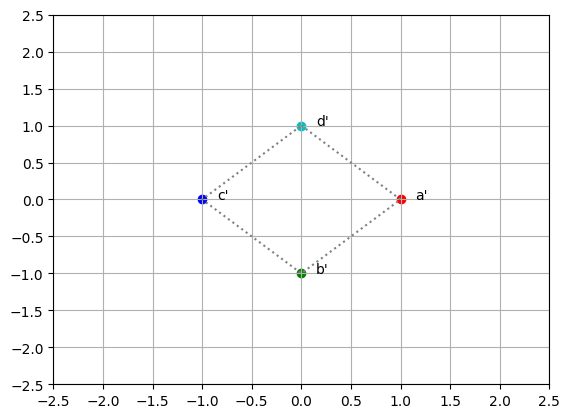

In [123]:
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
for row in A:
    output_row = T_r @ row
    x_r, y_r, i_r = output_row
    i_r = int(i_r) # convert float to int for indexing
    c_r = color_lut[i_r] # these are the same but, its good to be explicit
    letter_r = string.ascii_letters[i_r]
    plt.scatter(x_r, y_r, color=c_r)
    plt.text(x_r + 0.15, y_r, f"{letter_r}'")

plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

### Scale + Rotate
By using the affine transform matrixes, performing multiple transformations is quite easy.

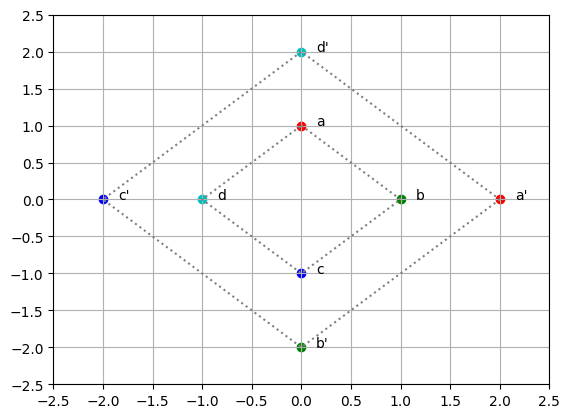

In [124]:
T = T_s @ T_r

fig = plt.figure()
ax = plt.gca()

xs_comb = []
ys_comb = []
for row in A:
    output_row = T @ row
    x, y, i = row
    x_comb, y_comb, i_comb = output_row
    xs_comb.append(x_comb)
    ys_comb.append(y_comb)
    i, i_comb = int(i), int(i_comb) # convert float to int for indexing
    c, c_comb = color_lut[i], color_lut[i_comb] # these are the same but, its good to be explicit
    letter, letter_comb = string.ascii_letters[i], string.ascii_letters[i_comb]
    plt.scatter(x, y, color=c)
    plt.scatter(x_comb, y_comb, color=c_comb)
    plt.text(x + 0.15 , y, f"{letter}")
    plt.text(x_comb + 0.15, y_comb, f"{letter_comb}'")
xs_comb.append(xs_comb[0])
ys_comb.append(ys_comb[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_comb, ys_comb, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

## Part II: Making things easier
There is a library for doing exactly the above: affine from PyPI https://pypi.org/project/affine/
(there is also another: https://pypi.org/project/affine-transform/)



In [9]:
%pip install affine

  Using cached affine-2.3.1-py2.py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\bjoern\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Usage
The 3x3 augmented affine transformation matrix for transformations in two dimensions is illustrated below.

| x' |   | a  b  c | | x |
| y' | = | d  e  f | | y |
| 1  |   | 0  0  1 | | 1 |
Matrices can be created by passing the values a, b, c, d, e, f to the affine.Affine constructor or by using its identity(), translation(), scale(), shear(), and rotation() class methods.

>>> from affine import Affine
>>> Affine.identity()
Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)
>>> Affine.translation(1.0, 5.0)
Affine(1.0, 0.0, 1.0,
       0.0, 1.0, 5.0)
>>> Affine.scale(2.0)
Affine(2.0, 0.0, 0.0,
       0.0, 2.0, 0.0)
>>> Affine.shear(45.0, 45.0)  # decimal degrees
Affine(1.0, 0.9999999999999999, 0.0,
       0.9999999999999999, 1.0, 0.0)
>>> Affine.rotation(45.0)     # decimal degrees
Affine(0.7071067811865476, -0.7071067811865475, 0.0,
       0.7071067811865475, 0.7071067811865476, 0.0)
These matrices can be applied to (x, y) tuples to obtain transformed coordinates (x', y').

>>> Affine.translation(1.0, 5.0) * (1.0, 1.0)
(2.0, 6.0)
>>> Affine.rotation(45.0) * (1.0, 1.0)
(1.1102230246251565e-16, 1.414213562373095)
They may also be multiplied together to combine transformations.

>>> Affine.translation(1.0, 5.0) * Affine.rotation(45.0)
Affine(0.7071067811865476, -0.7071067811865475, 1.0,
       0.7071067811865475, 0.7071067811865476, 5.0)

### Translation

In [10]:
from affine import Affine as aff

aff.translation(1.0, 5.0)
p  = (3,4)
aff.translation(1.0, 0.5) * p

(4.0, 4.5)

### Scale

In [11]:
aff.scale(50)*p

(150.0, 200.0)

### Combined rot*translation

In [12]:
aff.rotation(30)*aff.translation(4.5,3.6)*p

(2.69519052838329, 10.331793068761733)

## Part III: Possible Procedure

Assuming we now have a sheet of paper which is laying in a right angle in front of our roboter, with one corner touching our 1st joint.
Dimensions A4: 297 mm x 210 mm
Gives Coordinates
a = (0,0)
b = (297,0)
c = (297,210)
d = (0,210)
Middle point: pm = (c-a)/2
Angle of rotation is 0



In [13]:
a = np.array([0,0])
c = np.array([297,210])

pm = tuple((c-a)/2)
pm

(148.5, 105.0)

### Example 1

In [14]:
p1 = (-10,25)
p2 = (10,25)
p3 = (10,66)
p4 = (-10,66)

P = np.array([[-10,10,10,-10],[25,25,66,66]])

#def transform(x):
    
#    return aff.translation(148.5,105) * x

#np.apply_along_axis(transform, axis=1, arr=P)
P[:,0]
pp=(P[0,0],P[1,0])
pp
P.size
P.shape

#for row in P:
#    aff.translation(1.0, 5.0)*P[:,row]

#for i in P:
#  ppp = (i,i-1)
#  print(i)
#  print(ppp)

print("p1t =", aff.translation(pm[0],pm[1]) * p1)
print("p2t =", aff.translation(pm[0],pm[1]) * p2)
print("p3t =", aff.translation(pm[0],pm[1]) * p3)
print("p4t =", aff.translation(pm[0],pm[1]) * p4)




p1t = (138.5, 130.0)
p2t = (158.5, 130.0)
p3t = (158.5, 171.0)
p4t = (138.5, 171.0)


### Example 2:
Dimensions A4: 297 mm x 210 mm
Gives Coordinates
a = (0,0)
b = (297,0)
c = (297,210)
d = (0,210)
Middle point: pm = (c-a)/2
Angle of rotation is 30

In [15]:
print("p1t =", aff.translation(pm[0],pm[1]) * aff.rotation(30) * p1)
print("p2t =", aff.translation(pm[0],pm[1]) * aff.rotation(30) * p2)
print("p3t =", aff.translation(pm[0],pm[1]) * aff.rotation(30) * p3)
print("p4t =", aff.translation(pm[0],pm[1]) * aff.rotation(30) * p4)


print("test =", aff.translation(50,60) * (20,30))


p1t = (127.33974596215562, 121.65063509461098)
p2t = (144.6602540378444, 131.65063509461098)
p3t = (124.1602540378444, 167.15767664977295)
p4t = (106.83974596215562, 157.15767664977295)
test = (70.0, 90.0)


## Part IV: Trying to reconstruct the library for using with micropython

#### Example 1 without affine library

In [111]:
import math as m

def translation(xoff, yoff):
    return np.array([
        [1.0, 0.0, xoff],
        [0.0, 1.0, yoff],
        [0.0, 0.0, 1.0]
        ])

def cos_sin_deg(deg):
    """Return the cosine and sin for the given angle in degrees.

    With special-case handling of multiples of 90 for perfect right
    angles.
    """
    deg = deg % 360.0
    if deg == 90.0:
        return 0.0, 1.0
    elif deg == 180.0:
        return -1.0, 0
    elif deg == 270.0:
        return 0, -1.0
    rad = m.radians(deg)
    return m.cos(rad), m.sin(rad)

def rotation(angle, pivot=None):
    ca, sa = cos_sin_deg(angle)
    if pivot is None:
        return np.array([
            [ca, -sa, 0.0],
            [sa, ca, 0.0],
            [0.0, 0.0, 1.0]
            ])
    else:
        px, py = pivot
        return np.array([
            [ca, -sa, px - px * ca + py * sa],
            [sa, ca, py - px * sa - py * ca],
            [0.0, 0.0, 1.0]
            ])

def scale(*scaling):
    if len(scaling) == 1:
        sx = sy = float(scaling[0])
    else:
        sx, sy = scaling
    return np.array([
        [sx, 0.0, 0.0],
        [0.0, sy, 0.0],
        [0.0, 0.0, 1.0]
        ])


a = np.array([0,0])
c = np.array([297,210])

pm = tuple((c-a)/2)
print("pm=", pm)

p1 = (-10,25,1)
p2 = (10,25,1)
p3 = (10,66,1)
p4 = (-10,66,1)

p=np.array([20, 30 ,1])
t=np.sum(translation(pm[0], pm[1])*p1, axis=1)
t=tuple(t)
print("translation t=", t)
r=np.sum(rotation(30)*p, axis=1)
r=tuple(r)
print("rotation r=", r)

s=np.sum(scale(0.25)*p, axis=1)
s=tuple(s)
print("scaling s=", s)



print("p1t =", np.sum(translation(pm[0],pm[1]) * p1, axis=1))
print("p2t =", np.sum(translation(pm[0],pm[1]) * p2, axis=1))
print("p3t =", np.sum(translation(pm[0],pm[1]) * p3, axis=1))
print("p4t =", np.sum(translation(pm[0],pm[1]) * p4, axis=1))

pm= (148.5, 105.0)
translation t= (138.5, 130.0, 1.0)
rotation r= (2.3205080756887764, 35.98076211353316, 1.0)
scaling s= (5.0, 7.5, 1.0)
p1t = [138.5 130.    1. ]
p2t = [158.5 130.    1. ]
p3t = [158.5 171.    1. ]
p4t = [138.5 171.    1. ]


### Example 2 without affine library


In [118]:
import math as m

def translation(xoff, yoff):
    return np.array([
        [1.0, 0.0, xoff],
        [0.0, 1.0, yoff],
        [0.0, 0.0, 1.0]
        ])

def cos_sin_deg(deg):
    """Return the cosine and sin for the given angle in degrees.

    With special-case handling of multiples of 90 for perfect right
    angles.
    """
    deg = deg % 360.0
    if deg == 90.0:
        return 0.0, 1.0
    elif deg == 180.0:
        return -1.0, 0
    elif deg == 270.0:
        return 0, -1.0
    rad = m.radians(deg)
    return m.cos(rad), m.sin(rad)

def rotation(angle, pivot=None):
    ca, sa = cos_sin_deg(angle)
    if pivot is None:
        return np.array([
            [ca, -sa, 0.0],
            [sa, ca, 0.0],
            [0.0, 0.0, 1.0]
            ])
    else:
        px, py = pivot
        return np.array([
            [ca, -sa, px - px * ca + py * sa],
            [sa, ca, py - px * sa - py * ca],
            [0.0, 0.0, 1.0]
            ])

def scale(*scaling):
    if len(scaling) == 1:
        sx = sy = float(scaling[0])
    else:
        sx, sy = scaling
    return np.array([
        [sx, 0.0, 0.0],
        [0.0, sy, 0.0],
        [0.0, 0.0, 1.0]
        ])


a = np.array([0,0])
c = np.array([297,210])

pm = tuple((c-a)/2)
print("pm=", pm)

p1 = (-10,25,1)
p2 = (10,25,1)
p3 = (10,66,1)
p4 = (-10,66,1)

p=np.array([20, 30 ,1])
t=np.sum(translation(pm[0], pm[1])*p1, axis=1)
t=tuple(t)
print("translation t=", t)
r=np.sum(rotation(30)*p1, axis=1)
r=tuple(r)
print("rotation r=", r)

s=np.sum(scale(0.25)*p, axis=1)
s=tuple(s)
print("scaling s=", s)



print("p1t =", np.sum(translation(pm[0],pm[1]) * rotation(30,pm) * p1, axis=1))
print("p2t =", np.sum(translation(pm[0],pm[1]) * rotation(30,pm) * p2, axis=1))
print("p3t =", np.sum(translation(pm[0],pm[1]) * rotation(30,pm) * p3, axis=1))
print("p4t =", np.sum(translation(pm[0],pm[1]) * rotation(30,pm) * p4, axis=1))

pm= (148.5, 105.0)
translation t= (138.5, 130.0, 1.0)
rotation r= (-21.160254037844386, 16.65063509461097, 1.0)
scaling s= (5.0, 7.5, 1.0)
p1t = [ 1.07420310e+04 -6.29752944e+03  1.00000000e+00]
p2t = [ 1.07593515e+04 -6.29752944e+03  1.00000000e+00]
p3t = [ 1.07593515e+04 -6.26202240e+03  1.00000000e+00]
p4t = [ 1.0742031e+04 -6.2620224e+03  1.0000000e+00]


We can see an error here as a result of multiplying the matrixes.

### Need to fix this

## Part V: wohooo debug time!!!!

let us have some fun by trying out the mathematical statements one by one to find the error.

There must be a mathematical problem when multiplying the two transformation matrixes. Need to find out what the affine library is doing differently.

In [19]:
%pip install numpy
import math as m
import numpy as np

def translation(xoff, yoff):
    return np.array([
        [1.0, 0.0, xoff],
        [0.0, 1.0, yoff],
        [0.0, 0.0, 1.0]
        ])

def cos_sin_deg(deg):
    """Return the cosine and sin for the given angle in degrees.

    With special-case handling of multiples of 90 for perfect right
    angles.
    """
    deg = deg % 360.0
    if deg == 90.0:
        return 0.0, 1.0
    elif deg == 180.0:
        return -1.0, 0
    elif deg == 270.0:
        return 0, -1.0
    rad = m.radians(deg)
    return m.cos(rad), m.sin(rad)

def rotation(angle, pivot=None):
    ca, sa = cos_sin_deg(angle)
    if pivot is None:
        return np.array([
            [ca, -sa, 0.0],
            [sa, ca, 0.0],
            [0.0, 0.0, 1.0]
            ])
    else:
        px, py = pivot
        return np.array([
            [ca, -sa, px - px * ca + py * sa],
            [sa, ca, py - px * sa - py * ca],
            [0.0, 0.0, 1.0]
            ])

def scale(*scaling):
    if len(scaling) == 1:
        sx = sy = float(scaling[0])
    else:
        sx, sy = scaling
    return np.array([
        [sx, 0.0, 0.0],
        [0.0, sy, 0.0],
        [0.0, 0.0, 1.0]
        ])

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\bjoern\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [71]:
a = np.array([0,0])
c = np.array([297,210])

pm = tuple((c-a)/2)
print("pm=", pm)

p1 = (-10,25,1)
p2 = (10,25,1)
p3 = (10,66,1)
p4 = (-10,66,1)

p1r = rotation(30, pm) * p1

print("p1tr =", tuple(np.sum(translation(pm[0],pm[1]) @ p1r, axis=1)))
print("p2tr =", tuple(np.sum(rotation(30,pm) @ p2 * translation(pm[0],pm[1]), axis=1)))
print("p3tr =", tuple(np.sum(rotation(30,pm) @ p3 * translation(pm[0],pm[1]), axis =1)))
print("p4tr =", tuple(np.sum(rotation(30,pm) @ p4 * translation(pm[0],pm[1]), axis=1)))

p1 = (-10,25)
p2 = (10,25)
p3 = (10,66)
p4 = (-10,66)

print("afft=", aff.translation(pm[0],pm[1]))
print("affr=", aff.rotation(30))
print("afft*r=", aff.translation(pm[0],pm[1]) * aff.rotation(30))

print("afftp1=", aff.translation(pm[0],pm[1]) * p1)
print("affrp1=", aff.rotation(30) * p1)
print("afft*rp1=", aff.translation(pm[0],pm[1]) * aff.rotation(30) * p1)

print("p1aff =", aff.translation(pm[0],pm[1]) * aff.rotation(30, pm) * p1)
print("p2aff =", aff.translation(pm[0],pm[1]) * aff.rotation(30, pm) * p2)
print("p3aff =", aff.translation(pm[0],pm[1]) * aff.rotation(30, pm) * p3)
print("p4aff =", aff.translation(pm[0],pm[1]) * aff.rotation(30, pm) * p4)

pm= (148.5, 105.0)
p1tr = (199.73497350016646, 61.46796769724492, 1.0)
p2tr = (217.05548157585525, 71.46796769724492, 1.0)
p3tr = (196.55548157585525, 106.9750092524069, 1.0)
p4tr = (179.23497350016646, 96.9750092524069, 1.0)
afft= | 1.00, 0.00, 148.50|
| 0.00, 1.00, 105.00|
| 0.00, 0.00, 1.00|
affr= | 0.87,-0.50, 0.00|
| 0.50, 0.87, 0.00|
| 0.00, 0.00, 1.00|
afft*r= | 0.87,-0.50, 148.50|
| 0.50, 0.87, 105.00|
| 0.00, 0.00, 1.00|
afftp1= (138.5, 130.0)
affrp1= (-21.160254037844386, 16.65063509461097)
afft*rp1= (127.33974596215562, 121.65063509461098)
p1aff = (199.73497350016646, 61.46796769724492)
p2aff = (217.05548157585525, 71.46796769724492)
p3aff = (196.55548157585525, 106.9750092524069)
p4aff = (179.23497350016646, 96.9750092524069)


## Et voila!

This way it should work now also without the affine library.

Found out that for proper results, the @ operator must be used when multiplying the p-Vector.

Still, one must consider, to do the linear operations first (eg. Scale, Rotate, Shear) and apply the translation afterwards?

